# Data trimming to remove outliers


In [1]:
import numpy as np
import matplotlib.pyplot as plt

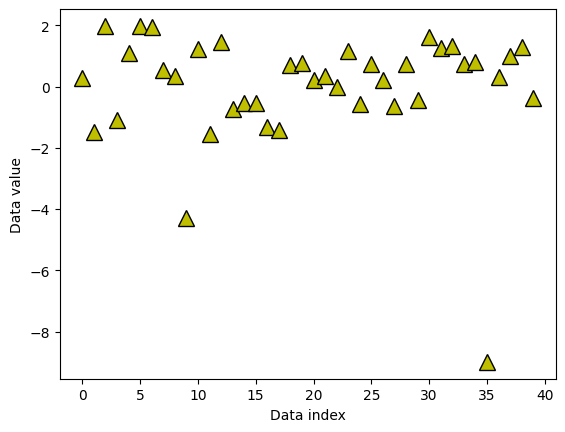

In [2]:
# create some data

N = 40
data = np.random.randn(N)
data[data < -2] = -data[data < -2]**2
data[data > 2] = data[data > 2]**2

# also need the mean-centered data
dataMC = data - np.mean(data)

# and plot them (not it ;) )
fig, ax = plt.subplots(1, 1)
ax.plot(dataMC, 'k^', markerfacecolor='y', markersize=12)
ax.set_xlabel('Data index')
ax.set_ylabel('Data value')
plt.show()

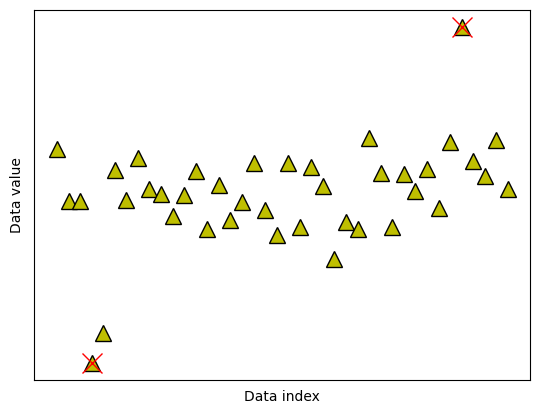

In [3]:
# option 1: remove k% of the data

# percent of "extreme" data values to remove
trimPct = 5  # in percent

# identify the cut-off (note the abs() )
datacutoff = np.percentile(abs(dataMC), 100-trimPct)

# find the exceedance data values
data2cut = np.where(abs(dataMC) > datacutoff)[0]

# and mark those off
ax.plot(data2cut, data[data2cut], 'rx', markersize=15)

fig

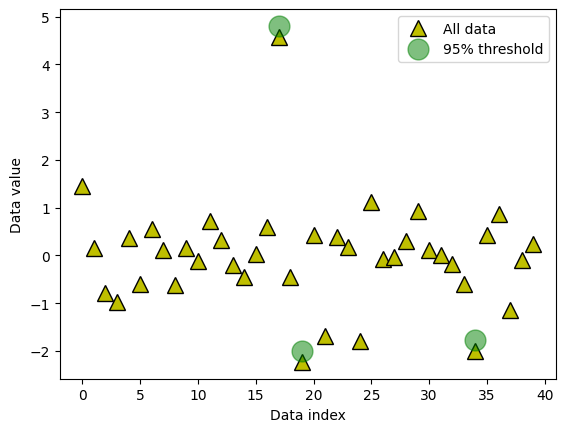

In [7]:
# option 2: remove k most extreme values

# number of "extreme" data values to remove
k2remove = 3  # in number

# find the exceedance data values
datasortIdx = np.argsort(abs(dataMC))[::-1]
data2cut = np.squeeze(datasortIdx[:k2remove])

# and mark those off
ax.plot(data2cut, data[data2cut], 'go', markersize=15, alpha=.5)

# finally, add a legend
ax.legend(('All data', '%g%% threshold' %
          (100-trimPct), '%g-value threshold' % k2remove))
fig